In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import math 

mdata = pd.read_csv("meningitis.csv")
mdata.head(10)

,decreased consciousness,fever,headache,vomiting,neck stiffness,blurred vision,behavioral changes,weakness in limbs,tingling,syncope,pain in neck,convulsion,speech defects,meningitis
0,23,65,0,20,75,0,0,10,35,0.0,0,0,0,1
1,14,70,14,0,56,10,0,0,35,4.0,0,10,20,1
2,0,45,0,0,23,0,36,0,0,0.0,46,0,0,0
3,14,0,12,0,14,0,0,0,0,12.0,13,10,35,0
4,13,10,10,10,10,15,0,0,0,0.0,12,13,15,0
5,67,43,0,35,55,0,0,23,67,0.0,0,0,0,1
6,32,63,47,0,77,33,0,0,45,0.0,0,0,0,1
7,14,48,45,11,68,0,0,14,34,0.0,13,0,32,1
8,32,0,0,0,12,0,0,0,73,0.0,45,0,0,0
9,30,46,23,57,34,0,0,60,55,0.0,0,0,0,1


In [2]:
print("number of patients in the data set ", str(len(mdata.index)))

number of patients in the data set  755


In [3]:
mdata.isnull().sum()

decreased consciousness    0
fever                      0
headache                   0
vomiting                   0
neck stiffness             0
blurred vision             0
behavioral changes         0
weakness in limbs          0
tingling                   0
syncope                    7
pain in neck               0
convulsion                 0
speech defects             0
meningitis                 0
dtype: int64

In [4]:
mdata.dropna(inplace=True)

In [5]:
mdata.isnull().sum()

decreased consciousness    0
fever                      0
headache                   0
vomiting                   0
neck stiffness             0
blurred vision             0
behavioral changes         0
weakness in limbs          0
tingling                   0
syncope                    0
pain in neck               0
convulsion                 0
speech defects             0
meningitis                 0
dtype: int64

In [8]:
mdata.drop("syncope", inplace = True, axis = 1)

In [9]:
mdata.head(2)

,decreased consciousness,fever,headache,vomiting,neck stiffness,blurred vision,behavioral changes,weakness in limbs,tingling,pain in neck,convulsion,speech defects,meningitis
0,23,65,0,20,75,0,0,10,35,0,0,0,1
1,14,70,14,0,56,10,0,0,35,0,10,20,1


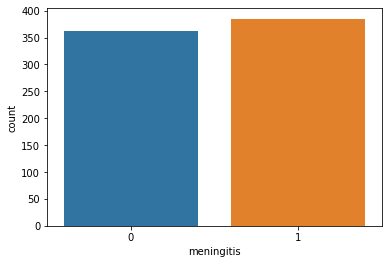

In [10]:
sns.countplot(x="meningitis", data = mdata)

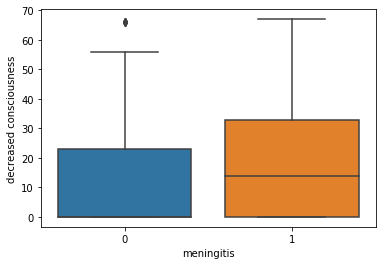

In [11]:
sns.boxplot(x="meningitis", y ="decreased consciousness", data = mdata)

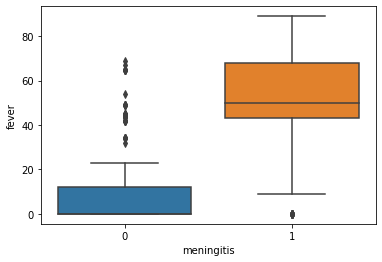

In [12]:
sns.boxplot(x="meningitis", y ="fever", data = mdata)

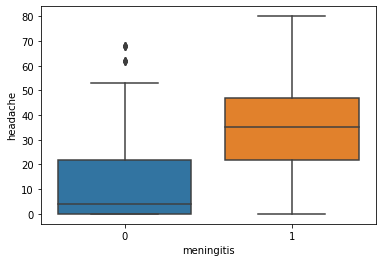

In [13]:
sns.boxplot(x="meningitis", y ="headache", data = mdata)

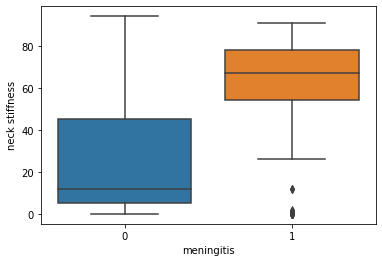

In [14]:
sns.boxplot(x="meningitis", y ="neck stiffness", data = mdata)

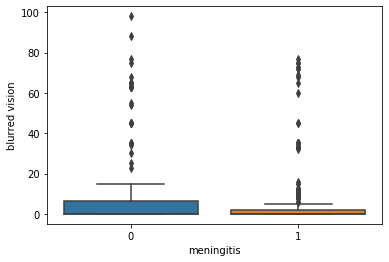

In [15]:
sns.boxplot(x="meningitis", y ="blurred vision", data = mdata)

In [16]:
mdata.drop("blurred vision", inplace = True, axis = 1)

In [17]:
mdata.head(2)

,decreased consciousness,fever,headache,vomiting,neck stiffness,behavioral changes,weakness in limbs,tingling,pain in neck,convulsion,speech defects,meningitis
0,23,65,0,20,75,0,10,35,0,0,0,1
1,14,70,14,0,56,0,0,35,0,10,20,1


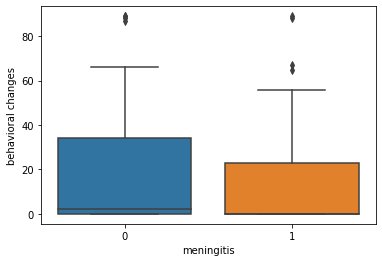

In [18]:
sns.boxplot(x="meningitis", y ="behavioral changes", data = mdata)

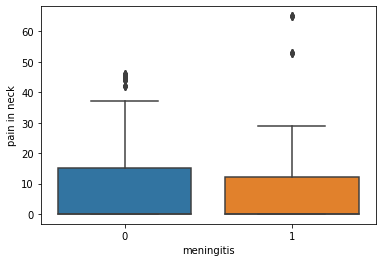

In [19]:
sns.boxplot(x="meningitis", y ="pain in neck", data = mdata)

In [21]:
mdata.drop("pain in neck", inplace = True, axis = 1)

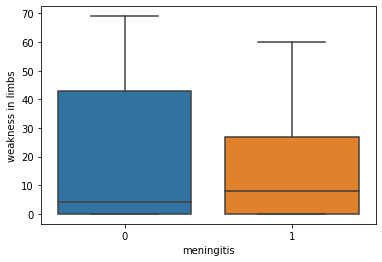

In [22]:
sns.boxplot(x="meningitis", y ="weakness in limbs", data = mdata)

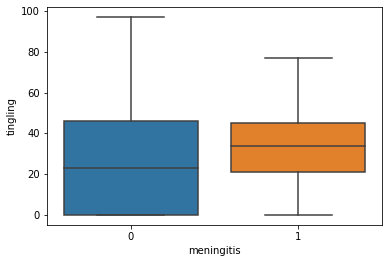

In [23]:
sns.boxplot(x="meningitis", y ="tingling", data = mdata)

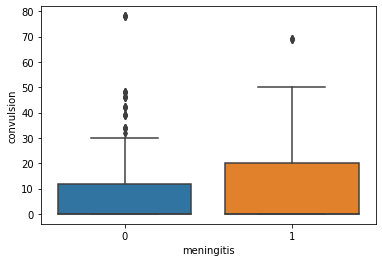

In [24]:
sns.boxplot(x="meningitis", y ="convulsion", data = mdata)

In [25]:
#neck stiffness, headache , fever and decreased consciousness is the reason for meningitis 

In [27]:
X = mdata.drop("meningitis", axis=1)
y = mdata["meningitis"]

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,random_state=1)

In [41]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred )

E:\python\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[88,  4],
       [ 2, 93]], dtype=int64)

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

96.79144385026738